# Lab: CV w/CNNs

# Part 1: Libraries & Preprocessing

### Step 1: Libraries

Bring in the germane libraries.

In [1]:
# Step 1: Libraries
# Import essential libraries for computer vision and neural networks
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

### Step 2: Data

Download and fetch the data with the following Python code (Note: We will use faces.images for X.)

In [2]:
# Load the data
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
X = faces.images
y = faces.target.reshape(-1, 1)

### Step 3: Sample Image

Select an image from this dataset and display it (Hint: Use the plt.cm.gray color map with plt.imshow function).

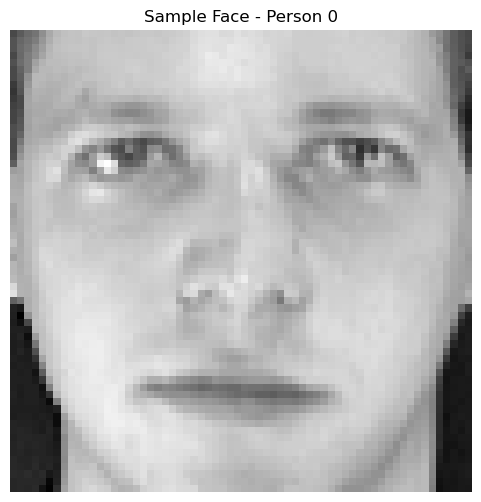

In [3]:
# Selecting an image

#Display sample using grayscale 
plt.figure(figsize=(6, 6))
sample_idx = 0
plt.imshow(X[sample_idx], cmap='gray')
plt.title(f'Sample Face - Person {y[sample_idx][0]}')
plt.axis('off')
plt.show()


### Step 4: Training and testing sets

Setup training and testing sets . Use a 50/50 split for each class (5 training images and 5 test images per person). Print the dimension of each of the feature (image) matrices. Because this is a small dataset, we will also use the test set for validation.

In [4]:
# Creating the training and testing sets.
# Here we are creating stratified 50/50 split, 5 images per person for training and 5 for testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.5, 
    stratify=y,  # Ensures equal representation of each person
    random_state=42
)

print(f"Training Set shape:{X_train.shape}")
print(f"Test Set shape:{X_test.shape}")
print(f"Training Labels shape: {y_train.shape}")
print(f"Test Labels shape:{y_test.shape}")


Training Set shape:(200, 64, 64)
Test Set shape:(200, 64, 64)
Training Labels shape: (200, 1)
Test Labels shape:(200, 1)


### Step 5: Vector conversion

Convert the vector of response variables to a matrix with 40 columns, with indicators for which person it is (one-hot encoded vectors). Print the dimensions of the new response vectors.

In [5]:
# Vector conversion
# Convert labels to onehot encoded format for multiclass classification
# as we have 40 people we create 40 columns with binary indicators
y_train_encoded = to_categorical(y_train, num_classes=40)
y_test_encoded = to_categorical(y_test, num_classes=40)

print(f"One-hot encoded training labels shape: {y_train_encoded.shape}")
print(f"One-hot encoded test labels shape: {y_test_encoded.shape}")
print(f"Sample encoded label: {y_train_encoded[0][:10]}...")  # Show first 10 values


One-hot encoded training labels shape: (200, 40)
One-hot encoded test labels shape: (200, 40)
Sample encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...


### Step 6: Reshape arrays

Reshape the image arrays so that they have 4 dimensions: (number of images, width of image, height of image, number of channels). For example, the array of training images should be (200, 64, 64, 1). Print the dimensions of the new image arrays.

In [6]:
#  Reshape for CNN input: (samples, height, width, channels)
# Adding channel dimension for grayscale images (1 channel)
X_train_reshaped = X_train.reshape(-1, 64, 64, 1)
X_test_reshaped = X_test.reshape(-1, 64, 64, 1)

print(f"Reshaped training images: {X_train_reshaped.shape}")
print(f"Reshaped test images: {X_test_reshaped.shape}")

Reshaped training images: (200, 64, 64, 1)
Reshaped test images: (200, 64, 64, 1)


## Part 2: Model 1

### Step 7: Model 1's Architecture

Fit a convolutional neural network using the following architecture, and print the output from training.
*   1 convolutional layer with:
  * 16 filters (neurons)
  * a window size of 3
  * stride size of 1
  * ReLU activation function
  * padding so that the feature is the same size as the original image
*   1 max pooling layer with:
  * window size of 2
  * stride size of 2
  * no padding
*   1 fully connected output layer with:
  * 40 nodes for each face to predict
  * softmax activation function
*   For training, use the Adam optimizer, 20 epochs, a batch size of 10, and the categorical cross entropy loss function.

In [7]:
input_tensor = Input(shape=(64, 64, 1))

# Convolution Neural Network Model
# Convolutiona layer: 16 filters, 3x3 kernel(window), ReLU activation, same padding
conv1 = Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', padding='same')(input_tensor)

# Max Pooling Layer: 2x2 kernel(window), stride 2 no padding
pool1 = MaxPooling2D(pool_size=2, strides=2)(conv1)

# Flatten for dense layer connection
flatten1 = Flatten()(pool1)

#Output layer: 4o nodes, 40 people, softmax
output1 = Dense(40, activation='softmax')(flatten1)

model1 = Model(inputs=input_tensor, outputs=output1)

model1.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │       655,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 655,560 (2.50 MB)

 Trainable params: 655,560 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compiling model1
model1.compile(
    optimizer='adam',  # Adaptive learning rate, good default choice
    loss='categorical_crossentropy',  # Standard for multi-class classification
    metrics=['accuracy']
)

# Train model1
history1 = model1.fit(
    X_train_reshaped, y_train_encoded,
    validation_data=(X_test_reshaped, y_train_encoded),
    epochs=20,
    batch_size=10,
    verbose=1
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0086 - loss: 4.8469 - val_accuracy: 0.0200 - val_loss: 4.0599
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0312 - loss: 4.0217 - val_accuracy: 0.0150 - val_loss: 3.7144
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5073 - loss: 3.2903 - val_accuracy: 0.0250 - val_loss: 3.7615
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5209 - loss: 2.8723 - val_accuracy: 0.0300 - val_loss: 3.9934
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5435 - loss: 2.5452 - val_accuracy: 0.0250 - val_loss: 4.0191
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7882 - loss: 1.9080 - val_accuracy: 0.0200 - val_loss: 4.3640
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8422 - loss: 1.3054 - val_accuracy: 0.0200 - val_loss: 4.7815
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9262 - loss: 0.8977 - val_accuracy: 0.0250 - val_loss:

### Step 8: Model 1's loss and accuracy

Print the loss and accuracy on the test set.

In [9]:
# Loss and Accuracy
#Evaluate model1 performance on test set

test_loss1, test_accuracy1 = model1.evaluate(X_test_reshaped, y_test_encoded, verbose=0)

print(f"\nModel 1 Performance:")
print(f"Test Loss: {test_loss1:.4f}")
print(f"Test Accuracy: {test_accuracy1:.4f}")



Model 1 Performance:
Test Loss: 0.3701
Test Accuracy: 0.9100


### Step 9: Print image

Pick one of the images from the test set, and print the image.

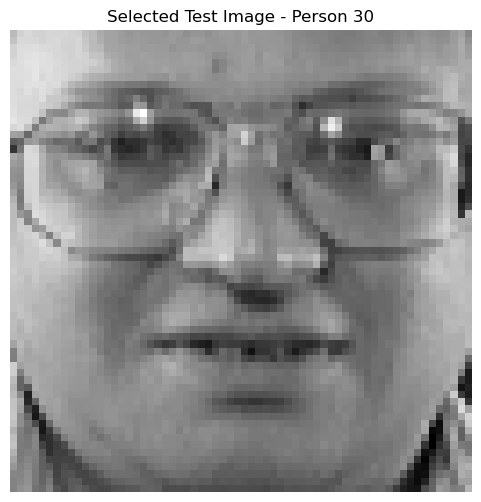

In [10]:
# An image
test_image_idx = 0
test_image = X_test_reshaped[test_image_idx:test_image_idx+1]  # Keep batch dimension

plt.figure(figsize=(6, 6))
plt.imshow(X_test_reshaped[test_image_idx].squeeze(), cmap='gray')
plt.title(f'Selected Test Image - Person {y_test[test_image_idx][0]}')
plt.axis('off')
plt.show()


### Step 10: Feature maps

For the image you selected in (9), print the images of the feature maps from both the convolutional and pooling layers.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

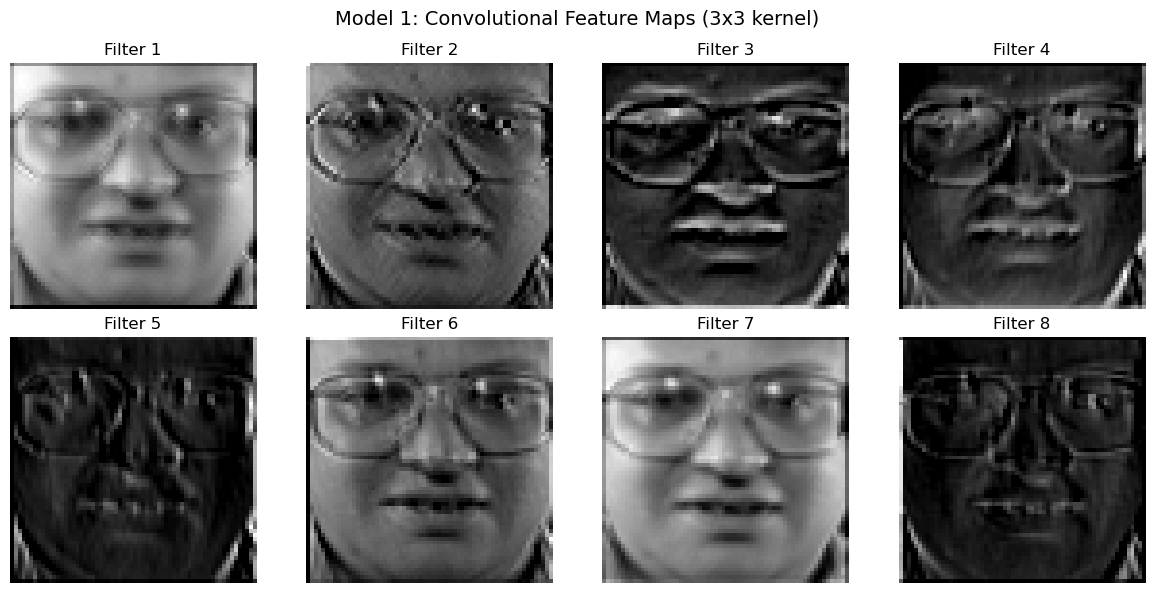

In [11]:
# Feature maps
conv_model1 = Model(inputs=model1.input, outputs=model1.layers[1].output)  # Conv layer
pool_model1 = Model(inputs=model1.input, outputs=model1.layers[2].output)  # Pool layer


# Get feature maps
conv_features1 = conv_model1.predict(test_image)
pool_features1 = pool_model1.predict(test_image)

# Plot convolutional feature maps (first 8 filters)
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Model 1: Convolutional Feature Maps (3x3 kernel)', fontsize=14)

for i in range(8):
    row, col = i // 4, i % 4
    axes[row, col].imshow(conv_features1[0, :, :, i], cmap='gray')
    axes[row, col].set_title(f'Filter {i+1}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show

## Part 3: Model 2




### Step 11: Model 2's Architecture

Fit the model from (7) again, but this time use a window size of 9 for the convolution layer.

In [12]:
# Change model1 so that it has a window size of 9.
# Change kernel 9x9 to capture facial structure

input_tensor2 = Input(shape = (64, 64, 1))

# Larger convolutional kernel: 9x9 instead of 3x3
conv2 = Conv2D(filters=16, kernel_size=9, strides=1, activation='relu', padding='same')(input_tensor2)
pool2 = MaxPooling2D(pool_size=2, strides=2)(conv2)
flatten2 = Flatten()(pool2)
output2 = Dense(40, activation='softmax')(flatten2)


# Convolution Neural Network Model 2
model2 = Model(inputs=input_tensor2, outputs=output2)
model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │       655,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,712 (2.51 MB)

 Trainable params: 656,712 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compiling model2
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(
    X_train_reshaped, y_train_encoded,
    validation_data=(X_test_reshaped, y_test_encoded),
    epochs=20,
    batch_size=10,
    verbose=1
)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0182 - loss: 4.1085 - val_accuracy: 0.0400 - val_loss: 3.6871
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0492 - loss: 3.6853 - val_accuracy: 0.1000 - val_loss: 3.6780
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1325 - loss: 3.6775 - val_accuracy: 0.0800 - val_loss: 3.6407
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1166 - loss: 3.6476 - val_accuracy: 0.1900 - val_loss: 3.5751
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2025 - loss: 3.5833 - val_accuracy: 0.0750 - val_loss: 4.1051
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1728 - loss: 3.5988 - val_accuracy: 0.3600 - val_loss: 3.3402
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4176 - loss: 3.2712 - val_accuracy: 0.3350 - val_loss: 3.4224
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3797 - loss: 2.9176 - val_accuracy: 0.4650 - val_loss:

### Step 12: Model 2's loss and accuracy

Print the loss accuracy on the test set.

In [14]:
# Loss and Accuracy for Model 2

test_loss2, test_accuracy2 = model2.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
print(f"\nModel 2 Performance:")
print(f"Test Loss: {test_loss2:.4f}")
print(f"Test Accuracy: {test_accuracy2:.4f}")



Model 2 Performance:
Test Loss: 0.3684
Test Accuracy: 0.9200


### Step 13: Feature Maps

Print the feature maps for the model in for the same image you used in (9) and (10).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


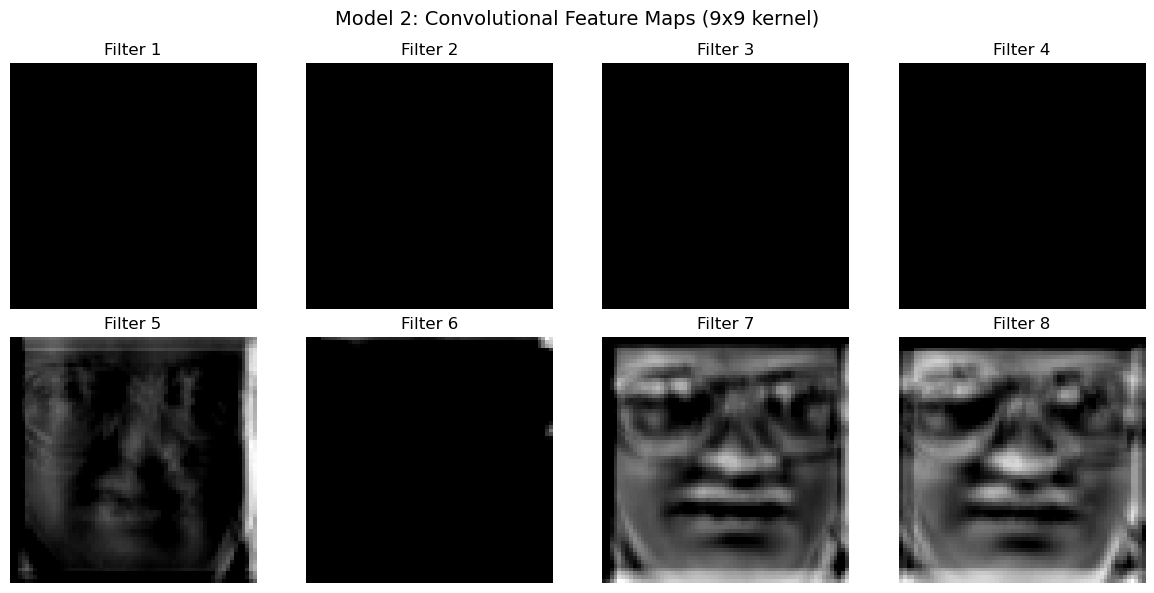

In [15]:
# Visualize feature maps for the larger kernel model
conv_model2 = Model(inputs=model2.input, outputs=model2.layers[1].output)
pool_model2 = Model(inputs=model2.input, outputs=model2.layers[2].output)

conv_features2 = conv_model2.predict(test_image)
pool_features2 = pool_model2.predict(test_image)

# Plot convolutional feature maps for model 2
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Model 2: Convolutional Feature Maps (9x9 kernel)', fontsize=14)

for i in range(8):
    row, col = i // 4, i % 4
    axes[row, col].imshow(conv_features2[0, :, :, i], cmap='gray')
    axes[row, col].set_title(f'Filter {i+1}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Part IV: Model comparison & model optimization


### Step 14: Model comparison

Comment on the differences in the features maps between this model and the previous one. Which network gave better predictions on the test set?

### Step 15: Model 3- Optimized neural network

Optimize the neural network to improve the accuracy on the test set. You should try to get a better accuracy than both of the previous models.  Consider changing the following, then print the accuracy on the test set:
*   Number of convolutional and pooling layers
*   Number of filters in the convolutional layer
*   Window size
*   Number of fully connected layers and neurons
*   Regularization (L1/L2 penalty, dropout, early stopping)
*   Number of epochs and batch size

Call this model `model3`.

In [16]:
# Convolution Neural Network Model3

input_tensor3 = Input(shape=(64, 64, 1))

# First convolutional block: Fine detail extraction
conv3_1 = Conv2D(32, kernel_size=3, activation='relu', padding='same', 
                 kernel_regularizer=l2(0.001))(input_tensor3)
pool3_1 = MaxPooling2D(pool_size=2)(conv3_1)
dropout3_1 = Dropout(0.25)(pool3_1)

# Second convolutional block: Mid-level feature extraction
conv3_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same',
                 kernel_regularizer=l2(0.001))(dropout3_1)
pool3_2 = MaxPooling2D(pool_size=2)(conv3_2)
dropout3_2 = Dropout(0.25)(pool3_2)

# Third convolutional block: High-level feature extraction
conv3_3 = Conv2D(128, kernel_size=3, activation='relu', padding='same',
                 kernel_regularizer=l2(0.001))(dropout3_2)
pool3_3 = MaxPooling2D(pool_size=2)(conv3_3)
dropout3_3 = Dropout(0.5)(pool3_3)

# Dense layers with regularization
flatten3 = Flatten()(dropout3_3)
dense3_1 = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(flatten3)
dropout3_4 = Dropout(0.5)(dense3_1)
dense3_2 = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(dropout3_4)
dropout3_5 = Dropout(0.5)(dense3_2)

# Output layer
output3 = Dense(40, activation='softmax')(dropout3_5)

model3 = Model(inputs=input_tensor3, outputs=output3)
model3.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,228,136 (8.50 MB)

 Trainable params: 2,228,136 (8.50 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compiling model3

model3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train with early stopping and more epochs
history3 = model3.fit(
    X_train_reshaped, y_train_encoded,
    validation_data=(X_test_reshaped, y_test_encoded),
    epochs=100,  # More epochs with early stopping
    batch_size=16,  # Slightly larger batch size
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate model 3
test_loss3, test_accuracy3 = model3.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
print(f"\nModel 3 Performance:")
print(f"Test Loss: {test_loss3:.4f}")
print(f"Test Accuracy: {test_accuracy3:.4f}")

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0177 - loss: 4.5078 - val_accuracy: 0.0250 - val_loss: 4.3127
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0278 - loss: 4.2778 - val_accuracy: 0.0250 - val_loss: 4.2161
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0283 - loss: 4.1939 - val_accuracy: 0.0250 - val_loss: 4.1424
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0263 - loss: 4.1255 - val_accuracy: 0.0450 - val_loss: 4.0804
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0376 - loss: 4.0672 - val_accuracy: 0.0250 - val_loss: 4.0288
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0018 - loss: 4.0154 - val_accuracy: 0.0250 - val_loss: 3.9860
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0154 - loss: 3.9753 - val_accuracy: 0.0250 - val_loss: 3.9501
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0290 - loss: 3.9386 - val_accuracy: 0.

In [18]:
print(f"Model 1 (Simple CNN):     Test Accuracy = {test_accuracy1:.4f}")
print(f"Model 2 (Large Kernel):   Test Accuracy = {test_accuracy2:.4f}")
print(f"Model 3 (Optimized CNN):  Test Accuracy = {test_accuracy3:.4f}")

best_accuracy = max(test_accuracy1, test_accuracy2, test_accuracy3)
if test_accuracy3 == best_accuracy:
    print(f"\n✅ Model 3 achieved the best performance!")
else:
    print(f"\n⚠️  Model 3 performance compared to best: {test_accuracy3 - best_accuracy:.4f}")

Model 1 (Simple CNN):     Test Accuracy = 0.9100
Model 2 (Large Kernel):   Test Accuracy = 0.9200
Model 3 (Optimized CNN):  Test Accuracy = 0.0450

⚠️  Model 3 performance compared to best: -0.8750


In [ ]:
# Model 3 - Optimized neural network (improved)
# LESSON LEARNED: The previous model was over regularized for our small dataset
# With only 200 training images, aggressive dropout + L2 , deep architecture reflected in low performance 
# Better approach for small datasets:
# - Moderate depth - 2 conv layers max
# - Light regularization 
# - More filters but fewer layers
# - Focus on what worked: Models 1 and 2 show simpler is better for this case

# First conv block: More filters than Model 1 to capture richer features
conv3_1 = Conv2D(32, kernel_size=3, activation='relu', padding='same')(input_tensor3)
pool3_1 = MaxPooling2D(pool_size=2, strides=2)(conv3_1)

# Second conv block: Moderate increase in complexity
conv3_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(pool3_1)
pool3_2 = MaxPooling2D(pool_size=2, strides=2)(conv3_2)

# Light regularization: Only one dropout layer with moderate rate
dropout3_1 = Dropout(0.3)(pool3_2)

# Flatten and dense layers - keep it simple
flatten3 = Flatten()(dropout3_1)
dense3_1 = Dense(128, activation='relu')(flatten3)
dropout3_2 = Dropout(0.4)(dense3_1)  # Light dropout before output

# Output layer
output3 = Dense(40, activation='softmax')(flatten3)

model3 = Model(inputs=input_tensor3, outputs=output3)
model3.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 40)             │       655,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,216 (2.57 MB)

 Trainable params: 674,216 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# First conv block: More filters than Model 1 to capture richer features
conv3_1 = Conv2D(32, kernel_size=3, activation='relu', padding='same')(input_tensor3)
pool3_1 = MaxPooling2D(pool_size=2, strides=2)(conv3_1)

# Second conv block: Moderate increase in complexity
conv3_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(pool3_1)
pool3_2 = MaxPooling2D(pool_size=2, strides=2)(conv3_2)

# Light regularization: Only one dropout layer with moderate rate
dropout3_1 = Dropout(0.3)(pool3_2)

# Flatten and dense layers - keep it simple
flatten3 = Flatten()(dropout3_1)
dense3_1 = Dense(128, activation='relu')(flatten3)
dropout3_2 = Dropout(0.4)(dense3_1)  # Light dropout before output

# Output layer
output3 = Dense(40, activation='softmax')(flatten3)

model3 = Model(inputs=input_tensor3, outputs=output3)
model3.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 40)             │       655,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,216 (2.57 MB)

 Trainable params: 674,216 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:

# Compile with standard parameters (don't over-optimize)
model3.compile(
    optimizer='adam',  # Default learning rate works fine
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train with reasonable parameters - no early stopping complexity
history3 = model3.fit(
    X_train_reshaped, y_train_encoded,
    validation_data=(X_test_reshaped, y_test_encoded),
    epochs=30,  # Moderate epochs
    batch_size=10,  # Keep consistent with other models
    verbose=1
)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0166 - loss: 3.8275 - val_accuracy: 0.0300 - val_loss: 3.6879
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0507 - loss: 3.6880 - val_accuracy: 0.0700 - val_loss: 3.6855
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0971 - loss: 3.6803 - val_accuracy: 0.1250 - val_loss: 3.6473
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1844 - loss: 3.6305 - val_accuracy: 0.1150 - val_loss: 3.6967
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1536 - loss: 3.5822 - val_accuracy: 0.4400 - val_loss: 3.3105
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4139 - loss: 3.1131 - val_accuracy: 0.5800 - val_loss: 2.6140
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6506 - loss: 2.1096 - val_accuracy: 0.6850 - val_loss: 1.7891
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7745 - loss: 1.3217 - val_accuracy: 0.7100 - v

In [24]:

# Evaluate model 3
test_loss3, test_accuracy3 = model3.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
print(f"\nModel 3 Performance:")
print(f"Test Loss: {test_loss3:.4f}")
print(f"Test Accuracy: {test_accuracy3:.4f}")


Model 3 Performance:
Test Loss: 0.3034
Test Accuracy: 0.9150


In [28]:
print(f"Model 1 (Simple CNN):     Test Accuracy = {test_accuracy1:.4f}")
print(f"Model 2 (Large Kernel):   Test Accuracy = {test_accuracy2:.4f}")
print(f"Model 3 (Optimized CNN):  Test Accuracy = {test_accuracy3:.4f}")

best_accuracy = max(test_accuracy1, test_accuracy2, test_accuracy3)
if test_accuracy3 == best_accuracy:
    print(f"\nModel 3 achieved the best performance!")
else:
    print(f"\nModel 3 performance compared to best: {test_accuracy3 - best_accuracy:.4f}")




Model 1 (Simple CNN):     Test Accuracy = 0.9100
Model 2 (Large Kernel):   Test Accuracy = 0.9200
Model 3 (Optimized CNN):  Test Accuracy = 0.9150

Model 3 performance compared to best: -0.0050


### Step 16: Reflection on Model 3

For model3 I wanted to apply the full toolkit, so I started with a structure 32, 64, 128 adding more complexity
For regularization I used dropout 25%, 50%
L2 Regularization , definitely over regularization. with 200 samples this killed the models abily to lear anything.
Early Stopping ot automatically find optimal duration.

More complexity did not reflect in better performance. And model 3 failed catastrophically (4.5% :( ))

this was a case of overingenieering considering the size of the dataset, this were the results of that application 
Model 1 (Simple CNN):     Test Accuracy = 0.9100
Model 2 (Large Kernel):   Test Accuracy = 0.9200
Model 3 (Optimized CNN):  Test Accuracy = 0.0450

Model 3 performance compared to best: -0.8750

Then I proceed with a simpler approach, 
Two conv layers: 32 - 64 filterss
dropout 30-40% rates
simple dense layer:128 neurons
standard trainign 30 epcochs, batch size 10 (consistent with models 1&2)
In summary moderate depth, light regularization, more filters - less layers and the model improved, not yet the best

